## Lab 9
Extraction de primitives

In [1]:
import skimage
import skimage.feature
import numpy as np
import matplotlib.pyplot as plt
import imageio as io

plt.rcParams['figure.figsize'] = (20, 10)

## Exercice 1 - Feature matching
Identifier un patch dans `img1` et l'associer à `img2` en utilisant la somme des différences carrées (SSD).

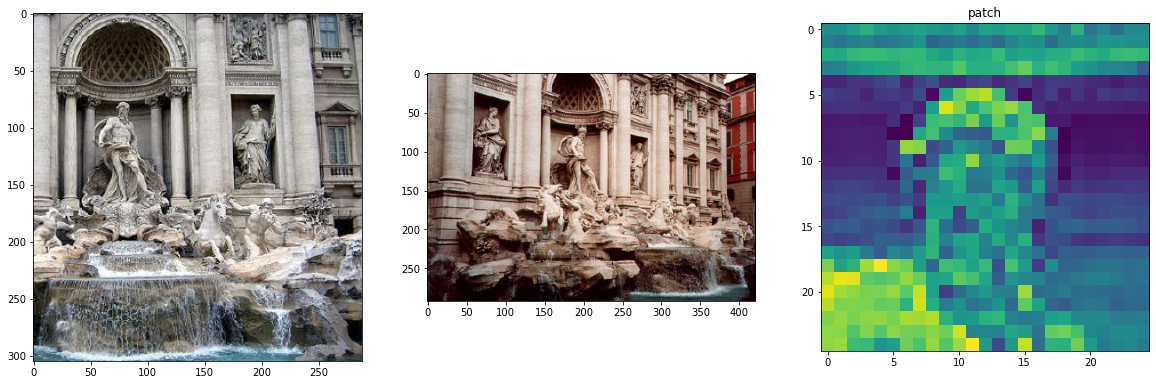

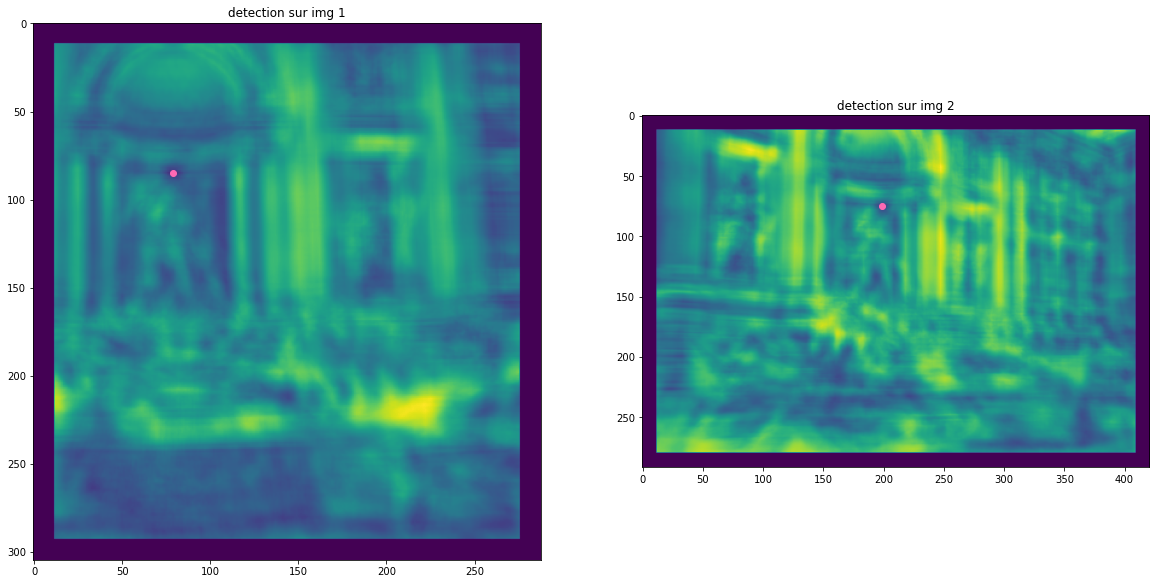

In [12]:
img1 = io.imread('statue1.PNG')
img2 = io.imread('statue2.PNG')

plt.subplot(131); plt.imshow(img1)
plt.subplot(132); plt.imshow(img2)

y = 73; x = 67
patch = img1[y:y+25, x:x+25].mean(axis=2)
r = patch.shape[0] // 2
plt.subplot(133); plt.imshow(patch); plt.title('patch')

plt.show()

def ssd(img, patch) -> list[list[int]]:
    m_diff = np.ones_like(img)
    lim = patch.shape[0] // 2
    for i in range(lim, img.shape[0] - lim):
        for j in range(lim, img.shape[1] -lim):
            m_diff[i,j] =  np.sum((img[i - lim: i + lim + 1, j - lim: j + lim + 1] - patch) ** 2)
    return m_diff

detect1 = ssd(img1.mean(axis=2), patch)
plt.subplot(121); plt.imshow(detect1);
i1, j1 = np.where(detect1 == detect1[r:-r, r:-r].min())
plt.scatter(j1,i1, color="hotpink"); plt.title("detection sur img 1")

detect2 = ssd(img2.mean(axis=2), patch)
plt.subplot(122); plt.imshow(detect2)
i2, j2 = np.where(detect2 == detect2[r:-r, r:-r].min())
plt.scatter(j2,i2, color="hotpink"); plt.title("detection sur img 2")

plt.show()




## Exercice 2
Essayer de détecter des coins/caractéristiques intéressant avec la méthode Harris.  
Utiliser `skimage.feature.corner_harris` pour obtenir la réponse au coin et `skimage.feature.corner_peaks` avec `threshold_rel` autour de 0.001 pour identifier le pixel au centre du coin.

(512, 512) 63 207
(512, 512) -0.5025452245700637 2.1881876429928067


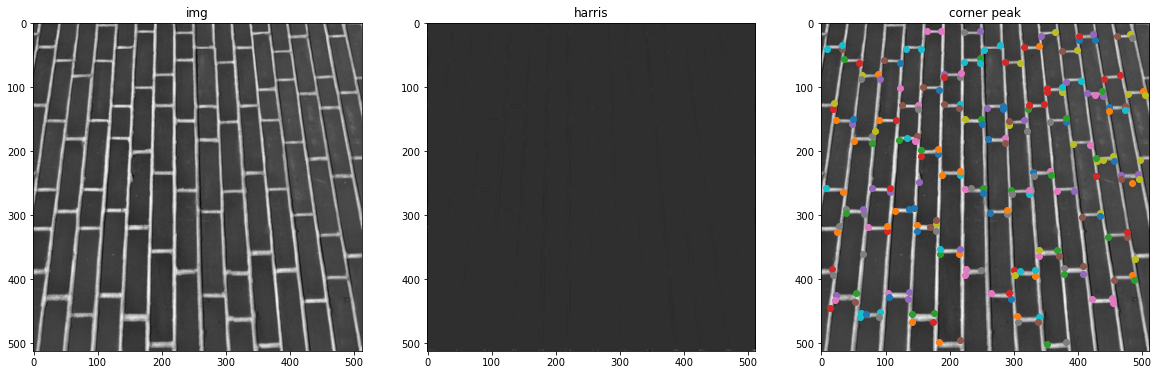

In [17]:
img = skimage.data.brick()
print(img.shape, img.min(), img.max())

plt.subplot(131); plt.imshow(img, cmap="gray"); plt.title('img')

harris = skimage.feature.corner_harris(img)
print(harris.shape, harris.min(), harris.max())
plt.subplot(132); plt.imshow(harris, cmap="gray"); plt.title('harris')

plt.subplot(133); plt.imshow(img, cmap="gray"); plt.title('corner peak')
coords = skimage.feature.corner_peaks(harris,min_distance=5, threshold_rel=0.001)
for line, col in coords:
    plt.scatter(col, line)
plt.show()